In [1]:
import numpy as np
import cv2 as cv
import PIL
from glob import glob

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = ['pdf', 'svg']

In [2]:
extensions = ('./samples/*.bmp', './samples/*.png')
files = glob(extensions[0]) + glob(extensions[1])
images = [cv.imread(f) for f in files]

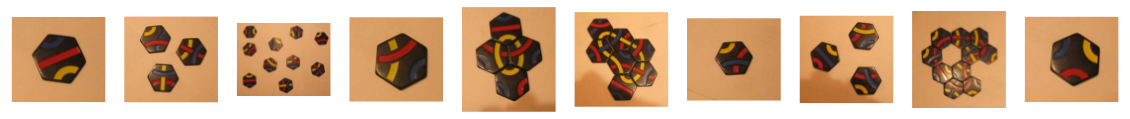

In [3]:
fig = plt.figure(figsize=(20, 7))

for i in range(1):
    for j in range(10):
        fig.add_subplot(2, 10, i*10 + j + 1)
        plt.imshow(cv.cvtColor(images[i*10 + j], cv.COLOR_BGR2RGB))
        plt.axis('off')

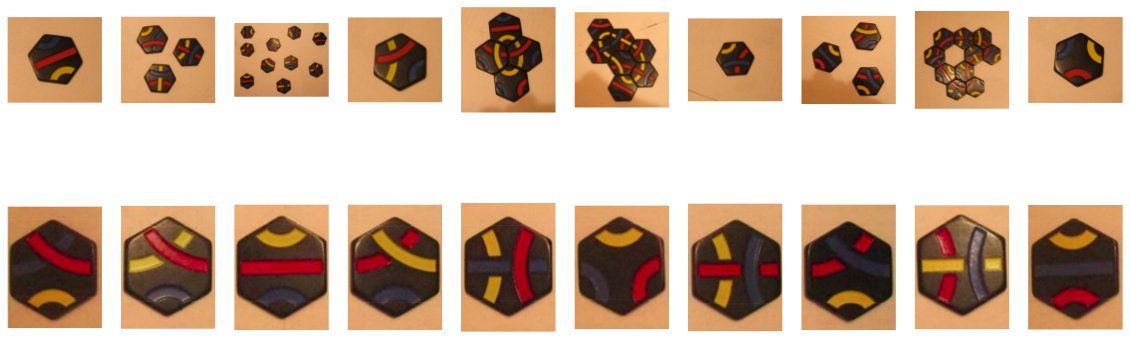

In [4]:
kernel = np.ones((3, 3), np.uint8)
eroded = [cv.erode(img, kernel) for img in images]

fig = plt.figure(figsize=(20, 7))

for i in range(2):
    for j in range(10):
        fig.add_subplot(2, 10, i*10 + j + 1)
        plt.imshow(cv.cvtColor(eroded[i*10 + j], cv.COLOR_BGR2RGB))
        plt.axis('off')

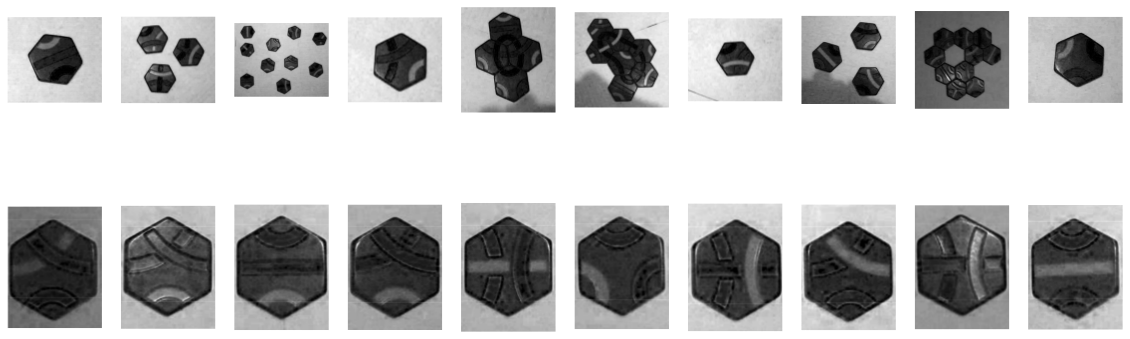

In [6]:
# YELLOW STRIDE

fig = plt.figure(figsize=(20, 7))

for i in range(2):
    for j in range(10):
        fig.add_subplot(2, 10, i*10 + j + 1)
        plt.imshow(eroded[i*10 + j][:, :, 0], 'gray')
        plt.axis('off')

In [5]:
# YELLOW STRIDE

blue = [img[:, :, 0] <= 65 for img in images]
green = [img[:, :, 1] >= 110 for img in images]
red = [img[:, :, 2] >= 130 for img in images]

yellow_mask = [r * g * b for r, g, b in zip(red, green, blue)]


# RED STRIDE

blue = [img[:, :, 0] <= 70 for img in images]
green = [img[:, :, 1] <= 50 for img in images]
red = [img[:, :, 2] >= 100 for img in images]

red_mask = [r * g * b for r, g, b in zip(red, green, blue)]


# BLUE STRIDE

blue = [img[:, :, 0] >= 40 for img in images]
green = [img[:, :, 1] <= 90 for img in images]
red = [img[:, :, 2] <= 90 for img in images]

blue_mask = [r * g * b for r, g, b in zip(red, green, blue)]

In [6]:
color_masks = {
    'yellow': yellow_mask,
    'red': red_mask,
    'blue': blue_mask
}

In [47]:
threshed = [cv.threshold(img[:, :, 1], 100, 255, cv.THRESH_BINARY)[1] for img in eroded]

fig = plt.figure(figsize=(20, 7))

for i in range(2):
    for j in range(10):
        fig.add_subplot(2, 10, i*10 + j + 1)
        plt.imshow(yellow_mask[i*10 + j], 'gray')
        plt.axis('off')

1) 0 -- 10; 160 -- 179 red  (120, 100, 20), (150, 255, 255)

15 30

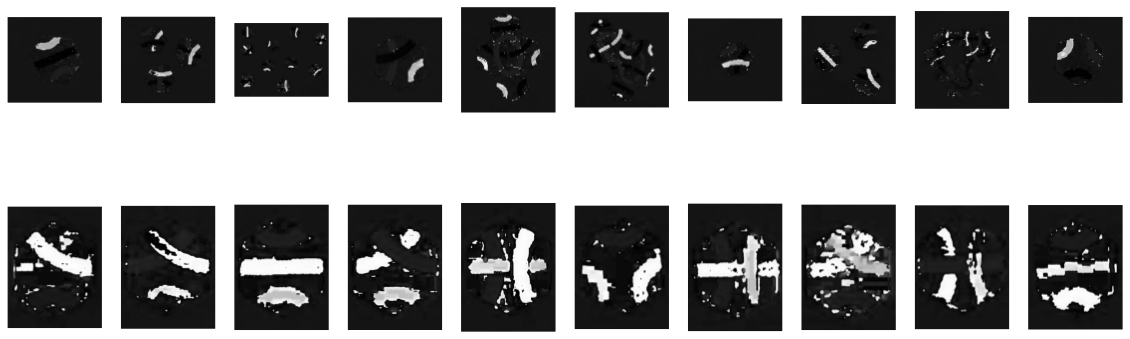

In [51]:
mask_blue = [cv.inRange(cv.cvtColor(img, cv.COLOR_BGR2HSV), (100, 150, 0), (140, 255, 255)) for img in images]
fig = plt.figure(figsize=(20, 7))

for i in range(2):
    for j in range(10):
        fig.add_subplot(2, 10, i*10 + j + 1)
        # plt.imshow(mask_blue[i*10 + j], 'gray')
        plt.imshow(cv.cvtColor(images[i*10 + j], cv.COLOR_BGR2HSV)[:, :, 0], 'gray')
        plt.axis('off')

### Corners

In [10]:

images = [cv.imread(f) for f in files]

masked_coins = []
binary = []

for img in images:

    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_gray = cv.erode(img_gray, np.ones((11,11)))
    _, img_gray = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

    #img_t = cv.adaptiveThreshold(img_t, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, 21, 10)
    img_gray = 255 - img_gray
    # img_gray = cv.morphologyEx(img_gray, cv.MORPH_CLOSE, np.ones((3,3)))
    cnt = cv.findContours(img_gray, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)[0]
    mask = np.zeros(img.shape[:2], np.uint8)
    mask = cv.drawContours(mask, cnt, -1, 255, -1)

    masked_coins.append(mask)
    #morph_imgs.append(img_t)
    binary.append((mask == 255).astype(np.uint8))

fig = plt.figure(figsize=(18, 6))
for i in range(2):
    for j in range(10):
        num = 10*i + j
        ax = fig.add_subplot(2, 10, num+1)
        # tmp = cv.erode(masked_coins[num], np.ones((11,11)))
        
        #mask = blue_y[num] * green_y[num] * red_y[num]
        plt.imshow(binary[num], 'gray')
        plt.axis('off')

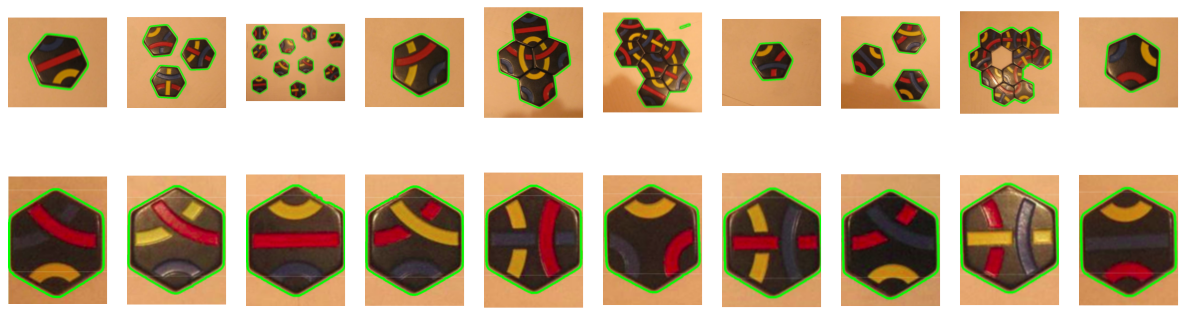

In [13]:
images = [cv.imread(f) for f in files]

fig = plt.figure(figsize=(21, 6))

for i in range(20):
    contours = cv.findContours(masked_coins[i], cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[0]
    new_img = cv.drawContours(images[i], contours, -1, (0,255,0), 5)
    fig.add_subplot(2, 10, i+1)
    plt.imshow(cv.cvtColor(new_img, cv.COLOR_BGR2RGB))
    plt.axis('off')

In [14]:
images = [cv.imread(f) for f in files]

fig = plt.figure(figsize=(21, 6))

contours = []
corners = []

for i in range(20):
    contour = cv.findContours(masked_coins[i], cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[0]
    contours.append(contour)
    new_img = cv.drawContours(images[i], contour, -1, (0,255,0), 5)

    corners_local = []
    for cnt in contour:
        if cv.contourArea(cnt) < 1100:
            continue
        # new_img = cv.drawContours(new_img, cv.approxPolyDP(cnt, 20, True), -1, (255,0,255), 20)
        corns = cv.approxPolyDP(cnt, 20, True)

        if len(corns) < 6:
            corns = cv.approxPolyDP(cnt, 15, True)
        corners_local.append(corns)

        for c in corns:
            cv.circle(new_img, (int(c.ravel()[0]), int(c.ravel()[1])), 15, (255,0,255), 5)
    corners.append(corners_local)

    fig.add_subplot(2, 10, i+1)
    plt.imshow(cv.cvtColor(new_img, cv.COLOR_BGR2RGB))
    plt.axis('off')

In [15]:
from itertools import cycle

def mark_line_centers(corners: np.ndarray):
    centers = []
    radius = []
    itrtr = cycle(corners.squeeze())
    point = next(itrtr)

    for i in range(corners.shape[0]):
        next_point = next(itrtr)

        centers.append((next_point + point) / 2)
        radius.append(np.linalg.norm(next_point - point) / 3)
        
        point = next_point

    return np.array(centers).reshape(corners.shape), radius

In [16]:
centers = [[mark_line_centers(corn)[0] for corn in group] for group in corners]
radius = [[mark_line_centers(corn)[1] for corn in group] for group in corners]

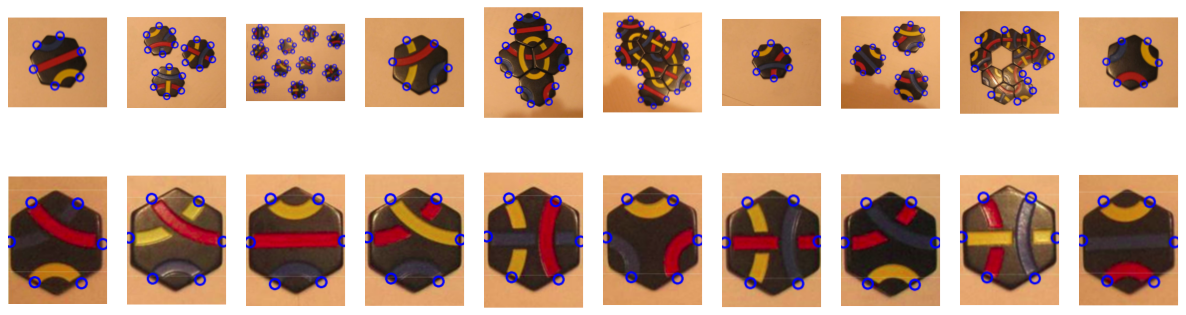

In [97]:
images = [cv.imread(f) for f in files]

fig = plt.figure(figsize=(21, 6))

for i in range(20):
    new_image = images[i].copy()
    for group in centers[i]:
        for center in group:
            new_image = cv.circle(new_image, (int(center.ravel()[0]), int(center.ravel()[1])), 15, (255,0,0), 5)

    fig.add_subplot(2, 10, i+1)
    plt.imshow(cv.cvtColor(new_image, cv.COLOR_BGR2RGB))
    plt.axis('off')

In [33]:
images = [cv.imread(f) for f in files]

fig = plt.figure(figsize=(21, 6))

center_masks = []

for i in range(20):
    new_image = images[i].copy()
    image_masks = []
    for group, radius_group in zip(centers[i], radius[i]):
        group_masks = []
        for center, r in zip(group, radius_group):
            new_image = cv.circle(new_image, (int(center.ravel()[0]), int(center.ravel()[1])), int(r), (255,255,255), 2)

            mask = np.zeros(images[i].shape[:2]) 
            mask = cv.circle(mask, (int(center.ravel()[0]), int(center.ravel()[1])), int(r), 255, -1)
            group_masks.append(mask)
        image_masks.append(group_masks)
    center_masks.append(image_masks)
            

    fig.add_subplot(2, 10, i+1)
    plt.imshow(cv.cvtColor(new_image, cv.COLOR_BGR2RGB))
    plt.axis('off')

(-0.5, 494.5, 453.5, -0.5)

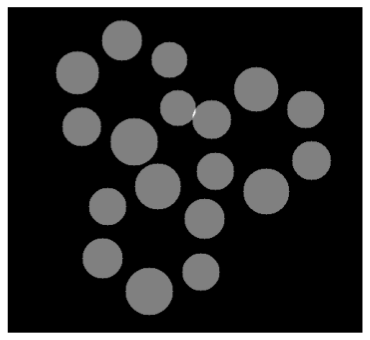

In [18]:
fig = plt.figure(figsize=(21, 6))

img = np.zeros_like(center_masks[1][0][0])

for i in range(len(center_masks[1])):
    for mask in center_masks[1][i]:
        img += mask

plt.imshow(img, 'gray')
plt.axis('off')

In [24]:
def count_colors(img_index: int, center_masks: list,
                 image_masks: list, color_masks: dict):
    groups = center_masks[img_index]
    coin_mask = image_masks[img_index]
    y, r, b = color_masks['yellow'][img_index], color_masks['red'][img_index],\
              color_masks['blue'][img_index]
    clrs = ['y', 'r', 'b']

    colors = []
    for group in groups:
        group_colors = []
        for mask in group:
            scores = np.zeros(3)      
            scores[0] = np.count_nonzero(coin_mask * mask * y)
            scores[1] = np.count_nonzero(coin_mask * mask * r)
            scores[2] = np.count_nonzero(coin_mask * mask * b)
            group_colors.append(clrs[np.argmax(scores)])
        colors.append(group_colors)

    return colors

In [25]:
color_codes = {
    1: 'rbyyrb',
    2: 'ybrrby',
    3: 'ybbrry',
    4: 'ybyrbr',
    5: 'yrbbry',
    6: 'ryrbyb',
    7: 'rybbry',
    8: 'yrbbyr',
    9: 'yrybrb',
    10: 'bryybr'
}

In [26]:
def decode_sequence(color_sequence: list, color_codes: dict):
    colors = []

    for group in color_sequence:
        group_code = ''.join(group)

        for label, value in color_codes.items():
            doubled = value + value
            if group_code in doubled:
                colors.append(label)
                break

    return colors

In [27]:
org = centers[0][0].squeeze().mean(axis=0).astype(int)

In [ ]:
font = cv.FONT_HERSHEY_SIMPLEX
color = (255, 255, 255)
fontScale = 1
thickness = 2
img = cv.putText(images[0], 'hi', org, font, 
                 fontScale, color, thickness, cv.LINE_AA, bottomLeftOrigin=False)

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [29]:
def draw_text(img, text,
        font=cv.FONT_HERSHEY_PLAIN,
        pos=(0, 0),
        font_scale=7,
        font_thickness=5,
        text_color=(255, 255, 0),
        text_color_bg=(0, 0, 0)
        ):

    x, y = pos
    text_size, _ = cv.getTextSize(text, font, font_scale, font_thickness)
    text_w, text_h = text_size
    cv.rectangle(img, pos, (x + text_w, y + text_h), text_color_bg, -1)
    cv.putText(img, text, (x, y + text_h + font_scale - 1), font, font_scale, text_color, font_thickness)

    return text_size

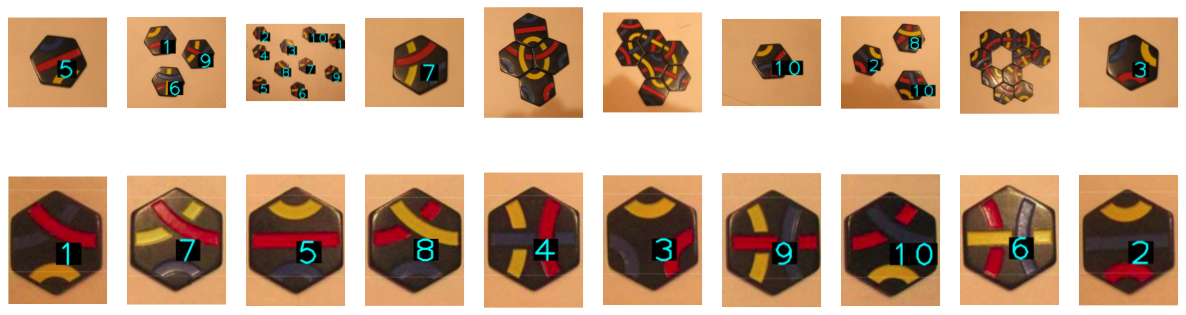

In [101]:
images = [cv.imread(f) for f in files]

fig = plt.figure(figsize=(21, 6))

for i in range(len(images)):
    
    c = count_colors(i, center_masks, binary, color_masks)
    labels = decode_sequence(c, color_codes)

    img = images[i].copy()
    for l in range(len(labels)):
        centroid = centers[i][l].squeeze().mean(axis=0).astype(int)
        draw_text(img, str(labels[l]), pos=centroid)
        #img = cv.putText(img, str(labels[l]), centroid, cv.FONT_HERSHEY_SIMPLEX, 
        #                 3, (255, 255, 255), 3, cv.LINE_AA, bottomLeftOrigin=False)
        
    fig.add_subplot(2, 10, i+1)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.axis('off')

In [3]:
import os
import PIL
import cv2 as cv
import numpy as np
from glob import glob
from itertools import cycle
import matplotlib.pyplot as plt


def coin_masks(images: list):
    masked_coins = []
    binary = []

    for img in images:
        img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        img_gray = cv.erode(img_gray, np.ones((11,11)))
        _, img_gray = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

        img_gray = 255 - img_gray
        image_gray = cv.morphologyEx(img_gray, cv.MORPH_CLOSE, np.ones((3,3)))
        cnt = cv.findContours(image_gray, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)[0]
        mask = np.zeros(img.shape[:2], np.uint8)
        mask = cv.drawContours(mask, cnt, -1, 255, -1)

        masked_coins.append(mask)
        binary.append((mask == 255).astype(np.uint8))
    return masked_coins, binary


def get_corners(images: list, masked_coins: list):

    contours = []
    corners = []

    for i in range(len(images)):
        contour = cv.findContours(masked_coins[i], cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[0]
        contours.append(contour)

        corners_local = []
        for cnt in contour:
            if cv.contourArea(cnt) < 1100:
                continue
            corns = cv.approxPolyDP(cnt, 20, True)

            if len(corns) < 6:
                corns = cv.approxPolyDP(cnt, 15, True)
            corners_local.append(corns)

        corners.append(corners_local)
    return contours, corners


def mark_line_centers(corners: np.ndarray):
    centers = []
    radius = []
    itrtr = cycle(corners.squeeze())
    point = next(itrtr)

    for _ in range(corners.shape[0]):
        next_point = next(itrtr)

        centers.append((next_point + point) / 2)
        radius.append(np.linalg.norm(next_point - point) / 3)
        
        point = next_point

    return np.array(centers).reshape(corners.shape), radius


def get_centers(images: list, centers: list, radius: list):
    center_masks = []

    for i in range(len(images)):
        image_masks = []
        for group, radius_group in zip(centers[i], radius[i]):
            group_masks = []
            for center, r in zip(group, radius_group):
                mask = np.zeros(images[i].shape[:2]) 
                mask = cv.circle(mask, (int(center.ravel()[0]), int(center.ravel()[1])), int(r), 255, -1)
                group_masks.append(mask)
            image_masks.append(group_masks)
        center_masks.append(image_masks)
    return center_masks


def count_colors(img_index: int, center_masks: list,
                 image_masks: list, color_masks: dict):
    groups = center_masks[img_index]
    coin_mask = image_masks[img_index]
    y, r, b = color_masks['yellow'][img_index], color_masks['red'][img_index],\
              color_masks['blue'][img_index]
    clrs = ['y', 'r', 'b']

    colors = []
    for group in groups:
        group_colors = []
        for mask in group:
            scores = np.zeros(3)      
            scores[0] = np.count_nonzero(coin_mask * mask * y)
            scores[1] = np.count_nonzero(coin_mask * mask * r)
            scores[2] = np.count_nonzero(coin_mask * mask * b)
            group_colors.append(clrs[np.argmax(scores)])
        colors.append(group_colors)

    return colors


def decode_sequence(color_sequence: list, color_codes: dict):
    colors = []

    for group in color_sequence:
        group_code = ''.join(group)

        for label, value in color_codes.items():
            doubled = value + value
            if group_code in doubled:
                colors.append(label)
                break

    return colors


def draw_text(img, text,
        font=cv.FONT_HERSHEY_PLAIN,
        pos=(0, 0),
        font_scale=7,
        font_thickness=5,
        text_color=(255, 255, 0),
        text_color_bg=(0, 0, 0)
        ):

    x, y = pos
    text_size, _ = cv.getTextSize(text, font, font_scale, font_thickness)
    text_w, text_h = text_size
    cv.rectangle(img, pos, (x + text_w, y + text_h), text_color_bg, -1)
    cv.putText(img, text, (x, y + text_h + font_scale - 1), font, font_scale, text_color, font_thickness)

    return text_size


def mark_coins(path: str):
    extensions = (os.path.join(path, '*.bmp'), os.path.join(path, '*.png'))
    files = glob(extensions[0]) + glob(extensions[1])
    images = [cv.imread(f) for f in files]

    color_codes = {
        1: 'rbyyrb',
        2: 'ybrrby',
        3: 'ybbrry',
        4: 'ybyrbr',
        5: 'yrbbry',
        6: 'ryrbyb',
        7: 'rybbry',
        8: 'yrbbyr',
        9: 'yrybrb',
        10: 'bryybr'
    }

    # YELLOW STRIDE
    blue = [img[:, :, 0] <= 65 for img in images]
    green = [img[:, :, 1] >= 110 for img in images]
    red = [img[:, :, 2] >= 130 for img in images]

    yellow_mask = [r * g * b for r, g, b in zip(red, green, blue)]

    # RED STRIDE
    blue = [img[:, :, 0] <= 70 for img in images]
    green = [img[:, :, 1] <= 50 for img in images]
    red = [img[:, :, 2] >= 100 for img in images]

    red_mask = [r * g * b for r, g, b in zip(red, green, blue)]

    # BLUE STRIDE
    blue = [img[:, :, 0] >= 40 for img in images]
    green = [img[:, :, 1] <= 90 for img in images]
    red = [img[:, :, 2] <= 90 for img in images]

    blue_mask = [r * g * b for r, g, b in zip(red, green, blue)]
    
    color_masks = {
        'yellow': yellow_mask,
        'red': red_mask,
        'blue': blue_mask
    }
    masked_coins, binary = coin_masks(images)
    _, corners = get_corners(images, masked_coins)
    centers = [[mark_line_centers(corn)[0] for corn in group] for group in corners]
    radius = [[mark_line_centers(corn)[1] for corn in group] for group in corners]
    center_masks = get_centers(images, centers, radius)

    
    fig = plt.figure(figsize=(21, 6))
    for i in range(len(images)):
        
        c = count_colors(i, center_masks, binary, color_masks)
        labels = decode_sequence(c, color_codes)

        img = images[i].copy()
        for l in range(len(labels)):
            centroid = centers[i][l].squeeze().mean(axis=0).astype(int)
            draw_text(img, str(labels[l]), pos=centroid)
            
        fig.add_subplot(2, 10, i+1)
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.axis('off')

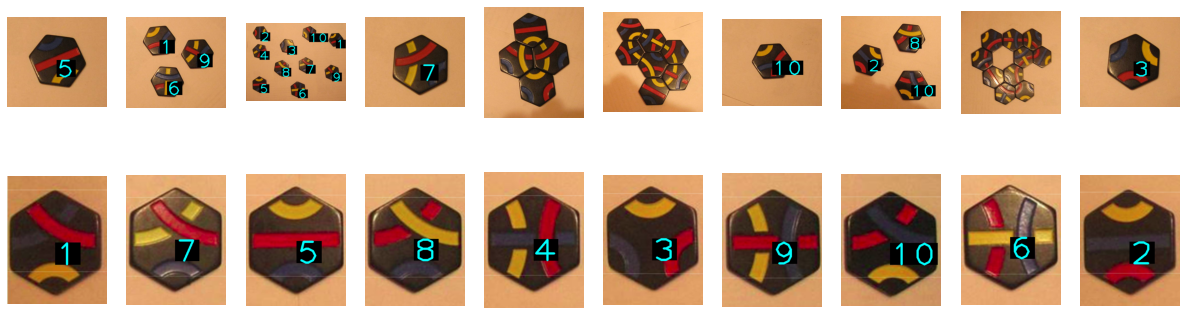

In [4]:
mark_coins('./samples/')